# ACTIVATION FUNCTIONS

In [4]:
import tensorflow as tf
print(tf.__version__)
!python --version

2.12.0
Python 3.11.2


In [18]:
import tensorflow_datasets as tfds
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.python.keras.callbacks import Callback
from tensorflow.python.keras.utils import np_utils
import numpy as np

In [19]:
# Load MNIST dataset from TensorFlow Datasets
image_train, label_train = tfds.as_numpy(tfds.load(
    'mnist',
    split='train',
    batch_size=-1,
    shuffle_files=True,
    as_supervised=True,
))

image_test, label_test = tfds.as_numpy(tfds.load(
    'mnist',
    split='test',
    batch_size=-1,
    shuffle_files=True,
    as_supervised=True,
))

## Data Preprocessing:

In [20]:
# Function to normalize images
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label

# Apply normalization to train and test datasets
image_train, label_train = normalize_img(image_train, label_train)
image_test, label_test = normalize_img(image_test, label_test)

## Creating NN with sigmoid activation function:

In [21]:
nn_sigmoid = Sequential()
nn_sigmoid.add(Flatten(input_shape=(28, 28, 1))),
nn_sigmoid.add(Dense(700, input_dim=784, activation='sigmoid'))
nn_sigmoid.add(Dense(700, activation='sigmoid'))
nn_sigmoid.add(Dense(700, activation='sigmoid'))
nn_sigmoid.add(Dense(700, activation='sigmoid'))
nn_sigmoid.add(Dense(700, activation='sigmoid'))
nn_sigmoid.add(Dense(350, activation='sigmoid'))
nn_sigmoid.add(Dense(100, activation='sigmoid'))
nn_sigmoid.add(Dense(10, activation='softmax'))

In [30]:
# Compile model with SGD
nn_sigmoid.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

## Creating NN with the ReLU activation function:

In [31]:
nn_relu = Sequential()
nn_relu.add(Flatten(input_shape=(28, 28, 1))),
nn_relu.add(Dense(700, input_dim=784, activation='relu'))
nn_relu.add(Dense(700, activation='relu'))
nn_relu.add(Dense(700, activation='relu'))
nn_relu.add(Dense(700, activation='relu'))
nn_relu.add(Dense(700, activation='relu'))
nn_relu.add(Dense(350, activation='relu'))
nn_relu.add(Dense(100, activation='relu'))
nn_relu.add(Dense(10, activation='softmax'))

In [32]:
# Compile model with SGD
nn_relu.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## Creating NN with the ELU activation function:

In [33]:
nn_elu = Sequential()
nn_elu.add(Flatten(input_shape=(28, 28, 1))),
nn_elu.add(Dense(700, input_dim=784, activation='elu'))
nn_elu.add(Dense(700, activation='elu'))
nn_elu.add(Dense(700, activation='elu'))
nn_elu.add(Dense(700, activation='elu'))
nn_elu.add(Dense(700, activation='elu'))
nn_elu.add(Dense(350, activation='elu'))
nn_elu.add(Dense(100, activation='elu'))
nn_elu.add(Dense(10, activation='softmax'))

In [34]:
# Compile model with SGD
nn_elu.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

## Callback function to store the loss values per batch:

In [35]:
import keras
class history_loss(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
 
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

## Training the models

In [36]:
n_epochs = 5
batch_size = 256
validation_split = 0.2

In [37]:
history_sigmoid = history_loss()
nn_sigmoid.fit(image_train, label_train, epochs=n_epochs, batch_size=batch_size,
                 callbacks=[history_sigmoid], validation_split=validation_split, verbose=2)

Epoch 1/5
188/188 - 17s - loss: 2.3224 - accuracy: 0.1123 - val_loss: 2.3010 - val_accuracy: 0.1128
Epoch 2/5
188/188 - 16s - loss: 2.3016 - accuracy: 0.1123 - val_loss: 2.3013 - val_accuracy: 0.1128
Epoch 3/5
188/188 - 15s - loss: 2.3016 - accuracy: 0.1117 - val_loss: 2.3014 - val_accuracy: 0.1128
Epoch 4/5
188/188 - 18s - loss: 2.3016 - accuracy: 0.1118 - val_loss: 2.3011 - val_accuracy: 0.1128
Epoch 5/5
188/188 - 14s - loss: 2.3016 - accuracy: 0.1123 - val_loss: 2.3015 - val_accuracy: 0.1128


In [38]:
history_relu = history_loss()
nn_relu.fit(image_train, label_train, epochs=n_epochs, batch_size=batch_size,
                 callbacks=[history_relu], validation_split=validation_split, verbose=2)

Epoch 1/5
188/188 - 14s - loss: 2.1652 - accuracy: 0.4252 - val_loss: 1.8408 - val_accuracy: 0.6317
Epoch 2/5
188/188 - 13s - loss: 1.1380 - accuracy: 0.7446 - val_loss: 0.6656 - val_accuracy: 0.8211
Epoch 3/5
188/188 - 13s - loss: 0.5161 - accuracy: 0.8543 - val_loss: 0.4588 - val_accuracy: 0.8660
Epoch 4/5
188/188 - 13s - loss: 0.3934 - accuracy: 0.8844 - val_loss: 0.3804 - val_accuracy: 0.8895
Epoch 5/5
188/188 - 13s - loss: 0.3281 - accuracy: 0.9043 - val_loss: 0.3250 - val_accuracy: 0.9077


In [39]:
history_elu = history_loss()
nn_elu.fit(image_train, label_train, epochs=n_epochs, batch_size=batch_size,
                 callbacks=[history_elu], validation_split=validation_split, verbose=2)

Epoch 1/5
188/188 - 15s - loss: 0.8089 - accuracy: 0.7998 - val_loss: 0.4483 - val_accuracy: 0.8797
Epoch 2/5
188/188 - 12s - loss: 0.3820 - accuracy: 0.8924 - val_loss: 0.3512 - val_accuracy: 0.9005
Epoch 3/5
188/188 - 12s - loss: 0.3201 - accuracy: 0.9072 - val_loss: 0.3149 - val_accuracy: 0.9089
Epoch 4/5
188/188 - 13s - loss: 0.2892 - accuracy: 0.9151 - val_loss: 0.2914 - val_accuracy: 0.9158
Epoch 5/5
188/188 - 13s - loss: 0.2685 - accuracy: 0.9208 - val_loss: 0.2741 - val_accuracy: 0.9213


## Plotting the losses:

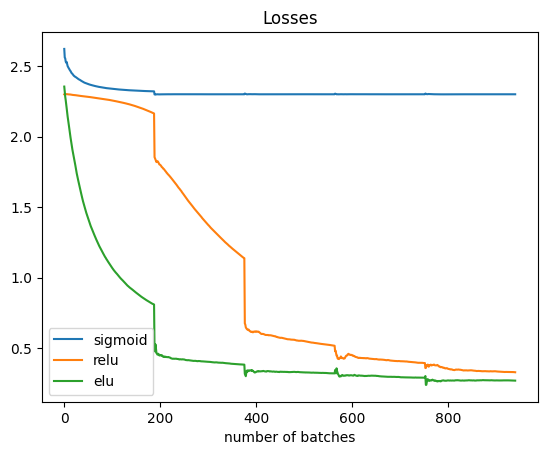

In [41]:
import matplotlib.pyplot as plt
# % matplotlib inline
plt.plot(np.arange(len(history_sigmoid.losses)),history_sigmoid.losses,label='sigmoid' )
plt.plot(np.arange(len(history_relu.losses)),history_relu.losses ,label='relu' )
plt.plot(np.arange(len(history_elu.losses)),history_elu.losses ,label='elu' )
plt.title('Losses')
plt.xlabel('number of batches')
plt.legend(loc='best')
plt.show()